# Método de Newton

Consideremos la función $f(x)=2e^x-(x+1/2)^2$. Nos proponemos:

1. Determinar, gráficamete, un intervalo en el que se verifiquen las hipótesis de la regla de Fourier para $f$.
2. Aproximar la solución de $f(x)=0$ mediante el método de Newton

In [1]:
# Sólo para Python 2
# from __future__ import division, print_function 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[a,b] = [-2.000000,0.000000]


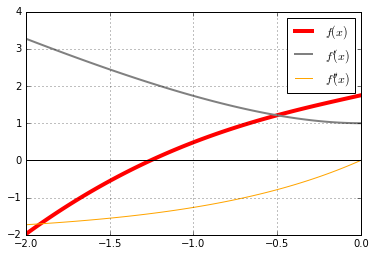

In [2]:
def f(x): return 2*np.exp(x) - (x+0.5)**2
def df(x): return 2*np.exp(x) - 2*(x+0.5)
def d2f(x): return 2*np.exp(x) - 2

# Mediante prueba y error, llegamos a este intervalo donde f cambia
# el signo pero f'>0 y 
a,b = -2, 0 
print("[a,b] = [%f,%f]" % (a,b))

x = np.linspace(a, b,100)
plt.plot(x, f(x), c="red", linewidth=4)
plt.plot(x, df(x), c="gray", lw=2)
plt.plot(x, d2f(x), c="orange")

plt.grid()
plt.axhline(c='k');
plt.legend([r"$f(x)$",r"$f'(x)$",r"$f''(x)$"])

Ahora programamos el método de Newton (es muy fácil si nos basamos en el programa de punto fijo visto en prácticas anteriores)

In [3]:
def newton(f, df, x0, tol=1e-10, maxiter=100):
    """Cálculo de una solución de $f(x)=0$ mediante el método de Newton.
    
    Argumentos:
        f: Función considerada
        df: Función derivada de f
        x0 : Estimación inicial
        tol: Tolerancia (diferencia entre dos iteraciones sucesivas)
        maxiter: Número máximo de iteraciones admitidas
    Valores devueltos: (x, niter) con
        x: Aproximación del punto fijo
        niter: Número de iteraciones realizadas
    """
    k = 0
    error = tol
    while k<maxiter and error >= tol:    
        x1 = x0-f(x0)/df(x0) # Iteración de punto fijo
        error = abs(x1-x0)
        x0 = x1 # Preparamos la siguiente iteración
        k = k+1
        
    # Si se llegó al número máximo de iteraciones, lanzar una excepción
    if k==maxiter: 
        raise ValueError("Error de convergencia!") 
        
    # Si todo fue bien, devolvemos la solución y el número de iteraciones
    return x1, k

In [4]:
x0 = -2 # Inicialización sugerida por la regla de Fourier
x, niter = newton(f,df,x0)
print("Aproximación por el m. de Newton:", x)
print("Número de iteraciones:", niter) 
print("Resíduo: |f(x)| = %1.16f" % abs(f(x)))

Aproximación por el m. de Newton: -1.25506090604
Número de iteraciones: 5
Resíduo: |f(x)| = 0.0000000000000000
